# Pràctica 4

In [19]:
reset()

#### Problema 1

In [2]:
var('a b x y')

(a, b, x, y)

In [3]:
y=function('y')(x)

In [4]:
edo1= y==(-1/diff(y,x))*(x-a)+b

In [5]:
sol1=desolve(edo1,ivar=x,dvar=y,contrib_ode=True)
sol1

[b*y(x) - 1/2*y(x)^2 == -a*x + 1/2*x^2 + _C]

In [6]:
# És l'equació d'una circumferència

#### Problema 2

In [25]:
edo2= y/diff(y,x)==2*x

In [26]:
desolve(edo2,ivar=x,dvar=y,contrib_ode=True)

[y(x) == _C*sqrt(x)]

#### Problema 3

In [7]:
var('t v k')

(t, v, k)

In [8]:
v=function('v')(t)

In [9]:
edo3 = diff(v,t)==-v*k

In [10]:
sol3=desolve(edo3,ivar=t,dvar=v,ics=[0,100])
sol3

100*e^(-k*t)

In [14]:
def real_sols(L):
    return [s for s in L if s.rhs().is_real()]

In [19]:
real_sols(solve(60==sol3(t=1),k))

[k == log(5/3)]

#### Problema 4

In [21]:
var('p h k')

(p, h, k)

In [22]:
p=function('p')(h)

In [25]:
# la presió dependrà del pes de la columna d'aire per sobre. Ara bé 
# dp=k*dm*g=\rho*dV*g=\rho*S*g*dh on S és la secció de la columna i per
# la llei de Marriot això és dp=k*p*dh (on k és una constant de 
# proporcionalitat)

edo4= diff(p,h)==k*p

In [26]:
sol4=desolve(edo4,ivar=h,dvar=p,ics=[0,1])
sol4

e^(h*k)

In [35]:
solk=solve(log(0.94)==log(sol4).simplify_full().subs(h=500),k)
solk

[k == (-3458687/27948803500)]

In [36]:
solk[0].rhs().n()

-0.000123750807436175

#### Problema 5

In [37]:
var('x t m t0')

(x, t, m, t0)

In [38]:
x=function('x')(t)

In [40]:
# Com que neva amb regularitat, l'alçada de neu en un temps t és 
# h(t)=h(0)+k*t=k2*(t+t0) on t0 és el temps que ha passat des que 
# ha començat a nevar i les 12:00, i t el temps que ha passat des de 
# es 12:00.
# La velocitat de les màquines és v(t)=x(t)/t.
# La quantitat de neu que treuen és Q(t)=x(t)*h(t).
# Per tant, v(t)=Q(t)/t * (1/h(t)).
# Si la quantitat de neu que treuen per unitat de temps és constant,
# llavors Q(t)/t=c.
# Per tant, v(t)=c/h(t) i llavors: dx/dt=m/(t+t0) on m=c/k

edo5= diff(x,t)==m/(t+t0)

In [41]:
sol5=desolve(edo5,x,ivar=t,ics=[0,0])
sol5

m*log(t + t0) - m*log(t0)

In [43]:
solve(2*sol5(t=1)==sol5(t=3),t0)

[log(t0) == -log(t0 + 3) + 2*log(t0 + 1)]

In [44]:
solve(t0 == (t0 + 3)^(-1)*(t0 + 1)^2,t0)

[t0 == 1]

In [57]:
# Ha començat a nevar a les 12:00:00 - 01:00:00 = 11:00:00

In [45]:
solve(3/2*sol5(t=1)==sol5(t=2),t0)

[log(t0) == -2*log(t0 + 2) + 3*log(t0 + 1)]

In [47]:
solve(t0 == (t0 + 2)^(-2)*(t0 + 1)^3,t0)

[t0 == -1/2*sqrt(5) - 1/2, t0 == 1/2*sqrt(5) - 1/2]

In [49]:
t0=_[1].rhs()
t0

1/2*sqrt(5) - 1/2

In [52]:
t0=t0.n()

In [53]:
t0*60

37.0820393249937

In [55]:
frac(t0*60)*60

4.92235949962165

In [56]:
# Ha començat a nevar a les 12:00:00 - 00:37:05 = 11:22:55

#### Problema 6

In [96]:
var('v t g k')

(v, t, g, k)

In [102]:
assume(k>0,g>0) # g=8.81

In [103]:
v=function('v')(t)

In [104]:
edo6= diff(v,t)==g-k*v^2 # ma=mg - kv^2
edo6

diff(v(t), t) == -k*v(t)^2 + g

In [105]:
sol6=desolve(edo6,v,ivar=t)
sol6

-1/2*log((k*v(t) - sqrt(g*k))/(k*v(t) + sqrt(g*k)))/sqrt(g*k) == _C + t

In [106]:
sol66=solve(sol6,v)[0].rhs()
sol66

-(sqrt(g*k)*e^(-2*sqrt(g*k)*_C - 2*sqrt(g*k)*t) + sqrt(g*k))/(k*e^(-2*sqrt(g*k)*_C - 2*sqrt(g*k)*t) - k)

In [107]:
limit(sol66,t=oo)

sqrt(g*k)/k

#### Problema 7

In [59]:
var('y x')

(y, x)

In [60]:
y=function('y')(x)

In [61]:
edo7= diff(y,x)+y*tan(x)==x*tan(x)+1
edo7

tan(x)*y(x) + diff(y(x), x) == x*tan(x) + 1

In [62]:
edo7.subs(x=0)

D[0](y)(0) == 1

In [65]:
edo77= diff(y,x)==1 # fent x=0
edo77

diff(y(x), x) == 1

In [66]:
sol7=desolve(edo77,y,ivar=x)
sol7

_C + x

In [115]:
sol7(x=0) # constant

_C

In [67]:
# Com que diff(y,x)==1, l'angle amb el que tallaran les rectes l'eix d'abscises és pi/4.

#### Problema 8

In [125]:
var('y x c k y1')

(y, x, c, k, y1)

In [126]:
y=function('y')(x)

In [127]:
f=exp(c*x+5)

In [128]:
df=diff(f,x)
df

c*e^(c*x + 5)

In [129]:
sol_c=solve(y==f,c)[0].rhs()
sol_c

(log(y(x)) - 5)/x

In [130]:
dfc=df.subs(c=sol_c)
dfc

(log(y(x)) - 5)*y(x)/x

In [131]:
edo8 = diff(y,x)==-1/dfc

In [132]:
sol8=desolve(edo8,dvar=y,ivar=x).subs(_C=k)
sol8

-1/2*log(y(x))*y(x)^2 + 11/4*y(x)^2 == 1/2*x^2 + k

In [135]:
sol88=sol8.subs(y(x)==y1)
sol88

-1/2*y1^2*log(y1) + 11/4*y1^2 == 1/2*x^2 + k

In [146]:
sol88_exp=solve(sol88,x)
sol88_exp

[x == -sqrt(-y1^2*log(y1) + 11/2*y1^2 - 2*k), x == sqrt(-y1^2*log(y1) + 11/2*y1^2 - 2*k)]

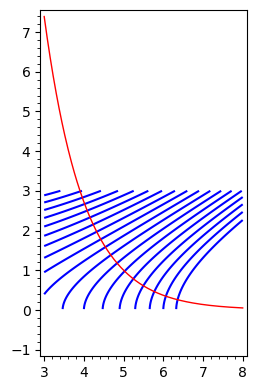

In [165]:
plot1=plot(f.subs(c=-1),3,8,color='red')
L=[implicit_plot((x == sqrt(-y1^2*log(y1) + 11/2*y1^2 - 2*k)).subs(k=i),(x,3,8),(y1,-1,3)) for i in srange(-20,20,2)]
plot1+sum(L)

#### Problema 9

In [264]:
var('A C B k b A0 B0')

(A, C, B, k, b, A0, B0)

In [265]:
A=function('A')(t)
B=function('B')(t)
C=function('C')(t)

In [257]:
A0=60
B0=30
reset('A0 B0')

In [266]:
edo91= diff(A,t)==-3*k*A*B
edo92= diff(B,t)==-2*k*A*B
edo93= diff(C,t)==5*k*A*B

In [267]:
edo99 = edo93/edo91
edo99

diff(C(t), t)/diff(A(t), t) == (-5/3)

In [268]:
sol9=desolve(edo99,C,ivar=t,contrib_ode=True)
sol9

_C - 5/3*A(t)

In [269]:
sol99=sol9.subs(_C=b)
sol99

b - 5/3*A(t)

In [270]:
b9=solve(b-5/3*A0==0,b)
b9

[b == 5/3*A0]

In [271]:
# Per tant A(t)=(150-C(t))*3/5
A=(b9[0].rhs()-C(t))*3/5
A

A0 - 3/5*C(t)

In [272]:
B=A0+B0-A-C
B

B0 - 2/5*C(t)

In [273]:
A*B

1/25*(5*A0 - 3*C(t))*(5*B0 - 2*C(t))

In [274]:
edo933= diff(C,t)==5*k*A*B
edo933

diff(C(t), t) == 1/5*(5*A0 - 3*C(t))*(5*B0 - 2*C(t))*k

In [275]:
sol93=desolve(edo933,C,ics=[0,0],ivar=t,contrib_ode=True)
sol93

(log(-5*A0 + 3*C(t)) - log(-5*B0 + 2*C(t)))/((2*A0 - 3*B0)*k) == ((2*A0 - 3*B0)*k*t + log(-5*A0) - log(-5*B0))/((2*A0 - 3*B0)*k)

In [282]:
solve(sol93,C)

[log(-5*B0 + 2*C(t)) == -2*A0*k*t + 3*B0*k*t - log(-5*A0) + log(-5*A0 + 3*C(t)) + log(-5*B0)]

In [283]:
z=log((2*C(t) -5*B0)/(-5*A0 + 3*C(t))) == -2*A0*k*t + 3*B0*k*t - log(-5*A0) + log(-5*B0) 

In [287]:
CC=solve(z,C)[0].rhs()
show(CC.factor())

5*A0*B0*(e^(2*A0*k*t) - e^(3*B0*k*t))/(2*A0*e^(2*A0*k*t) - 3*B0*e^(3*B0*k*t))

In [288]:
limit(CC.subs(A0=60,B0=30),t=oo)

75

In [ ]:
# Si augmentem A no canvia la quantitat de C ja que el reactiu 
# limitant és B.